Frequency content of a periodic signal

**Any periodic time signal $f(t)$ (of period T) can be reconstructed exclusively by means of a sum of sinusoids of different frequencies, amplitudes and phases, using the mathematical tool known as "Fourier series"**. These sinusoids are presented in the form of complex exponentials:

![](./img1.png)

with :  
- $c_0$, the DC component (ou average) of the time signal
- $\omega_0$ which is the fundamental frequency : $\omega_0 = \frac{2\pi}{T}$ and $T$ the period of the time signal $f(t)$ 
- $k\omega_0$ being the frequency of the harmonic of rank $k$.

It is common practice to represent a temporal signal $f(t)$ as a function of time (green curve on the graph below).

However, on the basis of what the Fourier Series decomposition proposes, an alternative representation can be proposed, by displaying **the "spectrum" of the signal**. This frequency representation **highlights the amplitude and the phase of each sinusoidal component contained in the signal $f(t)$**:

![](./img2.png)

This frequency representation is a tool that is intensively used in signal processing.

One observes that the frequency spectrum obtained is a **discrete spectrum**: there are values only for some particular values of frequency: the DC component, the fundamental and the harmonics. There is no sinusoidal component of other frequency contained in this periodic time signal.

Note also that the x-axis of this representation can be (as here above) graduated according to the rank of the sinusoidal component, but could also have been graduated according to the frequency $\omega$ or $f$. These representations are equivalent.

One also observes that the **spectrum** obtained is **symmetrical in amplitude on either side of the DC component** (which corresponds to $k = 0$) and that its **phase** is **of opposite sign** on either side of this same component. This makes sense: we know that we can **reconstruct a sinusoid as a sum of 2 vectors rotating at the same speed but in opposite directions**, these vectors having the same amplitude and phases of opposite signs:

![](./img3.png)

This sum of vectors rotating at the same speed but in opposite directions is also observed in the expression of the Fourier series:

$$c_0 + \sum_{k=1}^{\infty} \left[ c_k e^{jk\omega_0t} + c_{-k} e^{-jk\omega_0t} \right]$$

with:

- $c_k$ and $c_{-k}$ having the same norms but opposite phases
- the 2 complex exponentials $e^{jk\omega_0t}$ and $e^{-jk\omega_0t}$ rotating at the same speed $k\omega_0$ but in opposite directions

# Fourier Transform

If we generalise to an aperiodic signal (aka an infinite length period), we get an integral:

![](./img4.png)

# Nyquist Condition

In numerical signal analysis we will always use sampled signals.

To be able to reconstruct the full temporal signal from the sampled one we need at least 2 sample per period:

Exactly 2 samples per period:
![](./img10.png)

More than 2 samples per period:
![](./img11.png)

Less than 2 samples per period. We don't get the right frequency back. We get a lower frequency:
![](./img12.png)

This comes from the fact that the Fourier transform of the continuous version of a signal and the one from its sampled version are different. The later is a combinaison of the original signal and the Dirac comb that represent the sampling:

![](./img14.png)

The spectrum of the sampled signal have an amplitude divided by $T_s$ (the sampling period) and is replicated every $\omega_s$ on the frequency axis.

![](./img19.png)

We can see here why $\omega_{max}$ can't exceed $\frac{\omega_s}{2}$. If it does the replicas will overlap

![](./img25.png)

We speak of the **phenomenon of spectral folding** or **"Frequency Aliasing"**.


# Discrete Fourier Transform

As we work on real computers, our signals and spectrum can only be represented by discretized and finite data!

The DFT will get a signal describe by $N$ samples and will return a sampled spectrum describe by $N$ samples:

Discrete Fourier Transform:

$$F[n] = \sum_{k=0}^{N-1} f[k] e^{-j\frac{2\pi kn}{N}}$$

Inverse Discrete Fourier Transform:

$$f[k] = \frac{1}{N} \sum_{n=0}^{N-1} F[n] e^{j\frac{2\pi kn}{N}}$$

The sampled temporal signal is known at its samples separated by $T_s$ on the time axis.

The sampled spectrum is known at its samples separated by $d\omega = \frac{\omega_s}{N}$ or in Hz: $dF = \frac{F_s}{N}$ on the frequency axis.

20


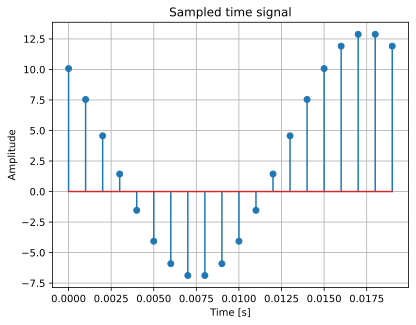

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# better plots in jupyter
%config InlineBackend.figure_formats = ['svg']

# Creation of the sampled time signal, containing a sine wave of frequency 50 Hz and
# 10V amplitude, and a DC component. Sampling happens every ms.
# We manage to get 20 samples, so that we have a complete period of the sine % wave.

N = 20                       # Number of samples
Ts = 0.001                   # Sampling period
fu = 50                      # Sine wave frequency
t = np.arange(0, N*Ts, Ts)   # Time vector creation
u = 3 + 10 * np.cos(2 * np.pi * fu * t + np.pi / 4)

plt.stem(t, u)
plt.title("Sampled time signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

### 8.2 - Application of the FFT using Python

The Numpy function `fft()` compute the FFT, of course we have to give as input the sampled time signal :

20


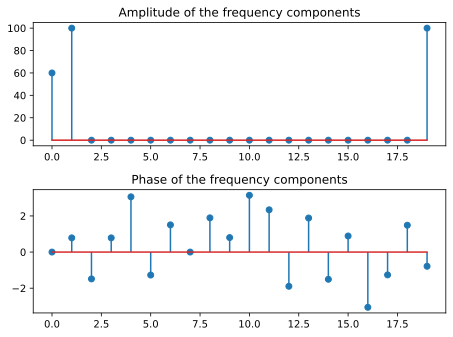

In [5]:
X = np.fft.fft(u)
print(len(X))
Amp=np.abs(X)              # We compute the norm of each vector component
Ph=np.angle(X)             # We compute the phase of each vector component
plt.subplot(2,1,1)
plt.stem(Amp)
plt.title('Amplitude of the frequency components')
plt.subplot(2,1,2)
plt.stem(Ph)
plt.title('Phase of the frequency components')
plt.tight_layout()
plt.show()

Nyquist frequency:  500.0  Hz
Frequency resolution:  50.0  Hz


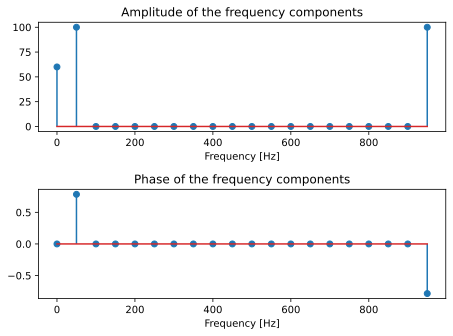

In [9]:
Ph[Amp<0.1]=0           # We delete the not relevant phase lines
Fs = 1 / Ts
FNyquist = Fs / 2   # We observe Nyquist condition is respected : our 50 Hz component is lower than the
                    # Nyquist frequency
print("Nyquist frequency: ", FNyquist, " Hz")

dF = Fs / N             # Frequency resolution
print("Frequency resolution: ", dF, " Hz")

n = np.arange(N)  # Indexes of the vector of frequencial data
f = n * dF        # The vector of the frequencies for our x-axis
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

We can go back to the second question and rephrase it now: why do we have a line at the frequency of 50 Hz and one at 950 Hz?

To answer this question, we must remember the phenomenon of spectral replicas due to the use of a sampled temporal signal. **The FFT does not in practice return the central replica (the one centered at 0 Hz), but the upper half of this replica, and the lower half of the replica centered at $F_s$:**

This is not a problem, since we know that this replica is identical to the central replica. We can ask Numpy to represent only the central replica, as expected, using the `fftshift()` function. We must then adapt the vector of x-axis accordingly:

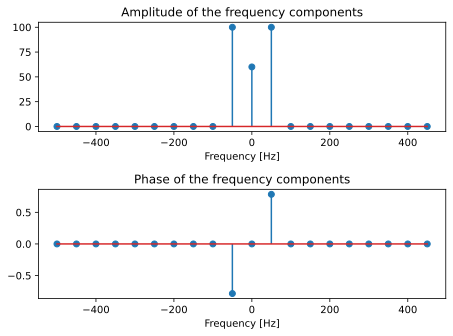

In [10]:
X = np.fft.fftshift(X)
Amp = np.abs(X)                                # We compute the norm of each vector component
Ph = np.angle(X)                               # We compute the phase of each vector component
Ph[Amp<0.1] = 0
f = np.arange(-FNyquist, FNyquist, dF)   # The vector of the frequencies for our x-axis
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

We now obtain the expected pattern: 2 lines of identical amplitude, rotating at the same speed but in opposite directions, and with phases of opposite sign. However, we notice that the amplitude of the lines is not the expected one: our component at 50 Hz being of amplitude 10 V, but here we have 2 components of amplitude 100 V. This is due to the fact that the **DFT presents the spectrum by multiplying its amplitude by a factor $N$**, the number of samples provided to the algorithm.

![](./img20.png)

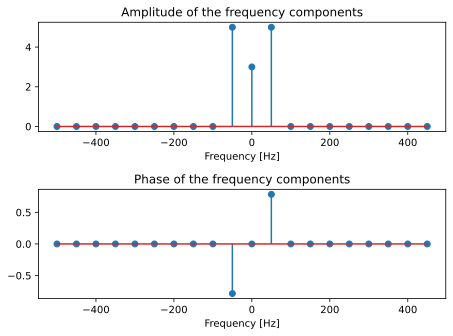

In [11]:
Amp = np.abs(X) / N       # We divide the amplitude by the number of samples (legacy of the DFT)
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

We now have 2 lines of 5 V amplitude, placed at -50 and 50 Hz, with the expected phase, to constitute our sinusoid of 10 V amplitude oscillating at 50 Hz.

In practice, we will not represent the negative frequency components, but only the positive ones. It is more practical this way: we don't have to sum the 2 rotating vectors, and we obtain directly the characteristics of the temporal signal in a more readable way.

Frequency resolution:  50.0  Hz


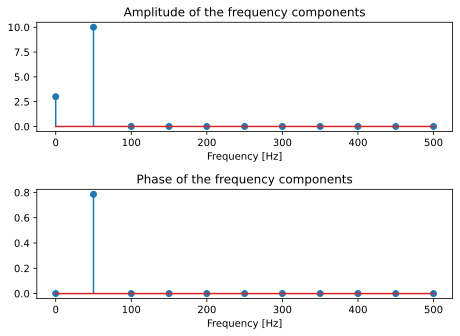

In [12]:
X = np.fft.fft(u)
Amp = np.abs(X) / N     # We divide the amplitude by the number of samples (legacy of the DFT)
Amp = Amp[:N//2+1]      # We keep only the upper half of the spectrum for the convenience of the representation
Amp[1:] = Amp[1:] * 2   # We multiply by 2 the amplitudes except for the DC component
 
Ph = np.angle(X)        
Ph = Ph[:N//2+1]        # We keep only the upper half of the spectrum
Ph[Amp<0.1] = 0         # We correct the errors of numerical calculation on the phases
 
dF = Fs / N             # The frequency resolution

print("Frequency resolution: ", dF, " Hz")

n = np.arange(N/2+1)       # Frequency data vector indices
f = n * dF                 # The frequency vector for our horizontal axes
 
plt.figure()
plt.subplot(2,1,1)
plt.stem(f,Amp)
plt.title('Amplitude of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.subplot(2,1,2)
plt.stem(f,Ph)
plt.title('Phase of the frequency components')
plt.xlabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

## The problem of windowing a temporal signal

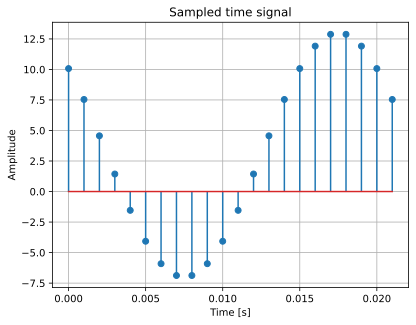

In [13]:
# This time we take 22 samples so we d'ont get an exact period of the sine wave

N = 22                       # Number of samples - PAY ATTENTION, we need an even number of samples
Ts = 0.001                   # Sampling period
fu = 50                      # Sine wave frequency
t = np.arange(0, N*Ts, Ts)   # Time vector creation
u = 3 + 10 * np.cos(2 * np.pi * fu * t + np.pi / 4)

plt.stem(t, u)
plt.title("Sampled time signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Frequency resolution:  45.45454545454545  Hz


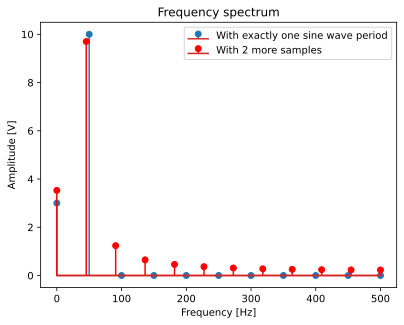

In [15]:
X = np.fft.fft(u)
  
Amp2=np.abs(X) / N           # We divide the amplitude by the number of samples (legacy of the DFT)
Amp2 = Amp2[:N//2+1] * 2     # We multiply by 2 the amplitudes and we keep only the upper half of the
                             # spectrum for the convenience of the representation...
Amp2[0] = Amp2[0] / 2        # ... except for the DC component
 
dF = Fs / N                  # The frequency resolution

print("Frequency resolution: ", dF, " Hz")

n = np.arange(N//2+1)   # Frequency data vector indices
f2 = n * dF             # The frequency vector for our horizontal axes
 
plt.figure()
plt.stem(f,Amp, label="With exactly one sine wave period")
plt.stem(f2,Amp2, "r", label="With 2 more samples")
plt.title('Frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.show()

The phenomenon observed is called **"Spectral leakage"**. It is due to the fact that the **DFT assumes that the sampled signal provided to it is repeated**.

![](./img21.png)

![](./img22.png)

To avoid this phenomenon, we will **window the signal in order to keep only a whole number of periods of our sinusoid**: the question is: how many to keep?

It depends of the frequency resolution that we want. This is logical, since $dF = \frac{F_s}{N}$, and that $N$ has been multiplied by 2 without changing $F_s$. **By increasing the duration of observation of the signal, we increase the number of samples and we decrease the frequency resolution**. To have a finer frequency resolution without changing the sampling frequency, it is therefore necessary to increase the size of the observation window, and therefore the number of samples: this is called windowing.